In [1]:
# Link Trabalho Final : https://www.dropbox.com/s/3fla2xuc8t9xba2/Deep%20Learning%20-%20Lista%20de%20Exerc%C3%ADcios%20v1.4.pdf?dl=0

In [2]:
from sklearn import datasets
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
from keras.callbacks import ModelCheckpoint   

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
file_path = 'D:\__Projetos_\_MBA\DeepLearning\deep_learning_final_17ia\dados\DatasetExercicio5.1.csv'
file_path2 = 'D:\__Projetos_\_MBA\DeepLearning\deep_learning_final_17ia\dados\Classes-Exercicio5.1.csv'

if os.path.exists(file_path) :
    print("Arquivo Existe")
if os.path.exists(file_path2) :
    print("Arquivo Existe")

Arquivo Existe
Arquivo Existe


In [4]:
# !ls '/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/DadosSpotify.csv'

In [5]:
df = pd.read_csv(file_path,sep=';')

print(df.shape)
df.head(5)

(30000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.732337,-0.460087,0.410588,1.387655,1.549960,-0.309028,-0.119034,-1.710895,-2.103701,0.270298,-0.951528,-1.738395,2.242746,-0.062398,3.600965,0.506660,-0.351065
1,-1.697668,-3.658057,-0.067462,-0.307627,-3.257361,3.018813,0.506056,-1.943546,-0.781291,-1.054938,-0.903841,-0.971778,0.725666,-0.288371,2.136540,-0.172262,-3.538182
2,-0.009419,-2.079725,0.695339,1.395909,-1.152059,-0.149841,-1.748309,0.663311,0.243399,-0.468567,-1.793045,0.313092,0.156787,0.646463,0.872121,-0.876460,-0.159286
3,-0.955029,2.413873,-0.239355,0.296029,0.785301,-2.146341,1.792001,0.023154,-0.379947,1.025835,0.083103,1.352882,0.061962,0.043511,-1.387151,1.786397,0.813789
4,2.282446,0.764661,0.385960,-3.203398,0.165334,2.816127,-0.592895,-0.460681,1.613249,-0.383905,1.345218,0.173645,1.299997,-0.356091,-2.358184,0.142573,-1.503465


In [6]:
df2 = pd.read_csv(file_path2)

print(df2.shape)
df2.head(5)

(30000, 1)


,0
0,7
1,4
2,6
3,5
4,1


In [7]:
concat = pd.concat([df,df2],axis=1)

print(concat.shape)
concat.head(10)

(30000, 18)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,-0.732337,-0.460087,0.410588,1.387655,1.549960,-0.309028,-0.119034,-1.710895,-2.103701,0.270298,-0.951528,-1.738395,2.242746,-0.062398,3.600965,0.506660,-0.351065,7
1,-1.697668,-3.658057,-0.067462,-0.307627,-3.257361,3.018813,0.506056,-1.943546,-0.781291,-1.054938,-0.903841,-0.971778,0.725666,-0.288371,2.136540,-0.172262,-3.538182,4
2,-0.009419,-2.079725,0.695339,1.395909,-1.152059,-0.149841,-1.748309,0.663311,0.243399,-0.468567,-1.793045,0.313092,0.156787,0.646463,0.872121,-0.876460,-0.159286,6
3,-0.955029,2.413873,-0.239355,0.296029,0.785301,-2.146341,1.792001,0.023154,-0.379947,1.025835,0.083103,1.352882,0.061962,0.043511,-1.387151,1.786397,0.813789,5
4,2.282446,0.764661,0.385960,-3.203398,0.165334,2.816127,-0.592895,-0.460681,1.613249,-0.383905,1.345218,0.173645,1.299997,-0.356091,-2.358184,0.142573,-1.503465,1
5,-0.713816,-0.616574,0.160519,-1.692975,0.980060,-0.193303,-0.331494,2.858454,-0.604789,2.841696,-0.088143,-1.129659,2.319393,0.022831,0.634337,-0.508594,2.581261,0
6,0.742155,-1.573932,-0.234802,-1.241070,1.673690,2.130111,0.281394,-1.245286,0.632090,-0.803289,-0.104619,-0.840556,1.980110,-0.612544,2.969955,-0.387794,0.816913,2
7,0.873751,0.195256,-0.168088,-2.524054,-1.916243,3.253399,-1.211223,1.857237,3.269247,0.196898,2.377251,-0.217932,-2.951695,-0.222007,-5.504074,-0.972476,-2.171356,5
8,0.589379,0.258247,1.091963,-3.493732,2.807936,5.454892,-0.311375,-0.416744,-0.007799,-0.226312,4.916241,1.222347,-0.479960,0.212871,0.729138,-1.279104,-1.467671,3
9,-1.879840,4.008358,1.127651,-0.689849,0.429449,-1.008465,0.405372,-2.285937,2.139779,-0.612271,2.637620,-0.059653,-4.330012,-0.730626,-3.437425,1.726261,0.411220,2


In [8]:
concat.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,1.000000,-0.001899,-0.003644,-0.001619,-0.000218,0.000595,0.000947,0.001373,0.011192,-0.006915,-0.002013,0.013629,-0.003676,-0.000692,-0.003278,-0.002583,0.005674,0.006847
1,-0.001899,1.000000,-0.013619,0.026846,0.156286,-0.532279,-0.011862,-0.119522,-0.031345,0.009578,0.025178,0.001179,-0.003694,-0.000831,-0.528225,0.006554,0.144510,-0.071429
2,-0.003644,-0.013619,1.000000,0.006683,-0.002436,0.000619,0.013646,0.008997,0.006984,0.000782,-0.008695,-0.002614,0.001377,-0.001127,0.002603,0.004943,0.004756,0.004059
3,-0.001619,0.026846,0.006683,1.000000,0.025842,-0.493383,0.002845,-0.063115,-0.130317,0.004896,-0.595702,0.003101,0.137438,0.004664,0.087543,0.005941,-0.088239,0.040137
4,-0.000218,0.156286,-0.002436,0.025842,1.000000,0.356500,-0.008852,-0.088741,-0.093688,-0.011115,0.449010,0.005249,0.034566,-0.011399,0.352633,-0.004484,-0.000975,-0.002967
5,0.000595,-0.532279,0.000619,-0.493383,0.356500,1.000000,0.004947,0.006155,0.106089,-0.014223,0.692708,-0.001059,-0.265431,-0.009599,0.294021,-0.010747,-0.510255,0.031676
6,0.000947,-0.011862,0.013646,0.002845,-0.008852,0.004947,1.000000,-0.004530,-0.001549,-0.001331,-0.007098,-0.001173,0.007710,-0.001390,0.004010,0.003445,-0.012244,0.000622
7,0.001373,-0.119522,0.008997,-0.063115,-0.088741,0.006155,-0.004530,1.000000,0.179020,0.001646,-0.004083,-0.002466,-0.050683,0.009363,-0.445947,-0.003108,0.151554,-0.115344
8,0.011192,-0.031345,0.006984,-0.130317,-0.093688,0.106089,-0.001549,0.179020,1.000000,-0.003575,-0.190351,0.000494,-0.224571,0.002086,-0.557816,-0.010159,0.127241,0.118247
9,-0.006915,0.009578,0.000782,0.004896,-0.011115,-0.014223,-0.001331,0.001646,-0.003575,1.000000,-0.008210,-0.008811,0.001816,-0.002591,-0.009123,0.001540,0.002023,-0.004370


In [9]:
# Separando dados em X e Y
X= df.to_numpy()
Y= df2.to_numpy()
print(X.shape, Y.shape, df.columns)

from sklearn.model_selection import train_test_split
X_TEMP,X_test,y_TEMP, y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 1 )
X_train,X_valid,y_train, y_valid = train_test_split(X_TEMP,y_TEMP,test_size = 0.2 , random_state = 1 )

(30000, 17) (30000, 1) Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'],
      dtype='object')


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [11]:
print("Shape DF:",df.shape)
print("Shape X_train:",X_train.shape)
print("Shape X_test:",X_test.shape)
print("Shape X_valid:",X_valid.shape)
print("Shape y_train:",y_train.shape)
print("Shape y_test:",y_test.shape)
print("Shape y_valid:",y_valid.shape)
type(X_train)

Shape DF: (30000, 17)
Shape X_train: (19200, 17)
Shape X_test: (6000, 17)
Shape X_valid: (4800, 17)
Shape y_train: (19200, 1)
Shape y_test: (6000, 1)
Shape y_valid: (4800, 1)


numpy.ndarray

In [12]:
modelo = Sequential()
modelo.add(Dense(activation = "relu", input_dim = 17, units = 82))
modelo.add(Dense(activation = "relu", units = 52))
modelo.add(Dense(activation = "relu", units = 34))
modelo.add(Dense(activation = "sigmoid", units = 10))
modelo.add(Dense(activation = "relu", units = 1))
# modelo.add(Dense(activation = "sigmoid", units = 1, 
#                      kernel_initializer = "uniform"))
modelo.compile(optimizer = 'SGD' , loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'] )
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 82)                1476      
_________________________________________________________________
dense_1 (Dense)              (None, 52)                4316      
_________________________________________________________________
dense_2 (Dense)              (None, 34)                1802      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                350       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 7,955
Trainable params: 7,955
Non-trainable params: 0
_________________________________________________________________


In [13]:
# modelo.fit(X_train , y_train ,epochs = 10)
checkpointer = ModelCheckpoint(filepath='checkpoint_5-1.hdf', verbose=1,  save_best_only=True, monitor='val_accuracy')

hist = modelo.fit(X_train, y_train, batch_size=150, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/15
 83/128 [==================>...........] - ETA: 0s - loss: nan - accuracy: 0.1223
Epoch 00001: val_accuracy improved from -inf to 0.12208, saving model to checkpoint_5-1.hdf
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: checkpoint_5-1.hdf\assets
128/128 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.1248 - val_loss: nan - val_accuracy: 0.1221
Epoch 2/15
 84/128 [==================>...........] - ETA: 0s - loss: nan - accuracy: 0.1256
Epoch 00002: val_accuracy did not improve from 0.12208
128/128 [==============================] - 0s 788us/step - loss: nan - accuracy: 0.1248 - val_loss: nan - val_accuracy: 0.1221
Epoch 3/15
 94/128 [=====================>........] - ETA: 0s - loss: nan - accuracy: 0.1236
Epoch 00003: val_accuracy 

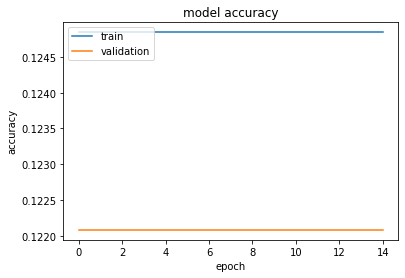

In [14]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
scores = modelo.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

188/188 [==============================] - 0s 646us/step - loss: nan - accuracy: 0.1237

accuracy: 12.37%


In [16]:
scores = modelo.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

600/600 [==============================] - 0s 632us/step - loss: nan - accuracy: 0.1248

accuracy: 12.48%


In [17]:
scores = modelo.evaluate(X_valid, y_valid)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

150/150 [==============================] - 0s 703us/step - loss: nan - accuracy: 0.1221

accuracy: 12.21%
